In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [37]:
data_ = uproot.open("outfile.root")["ntuples"]["tree"]

In [38]:
from mpl_toolkits.mplot3d import Axes3D

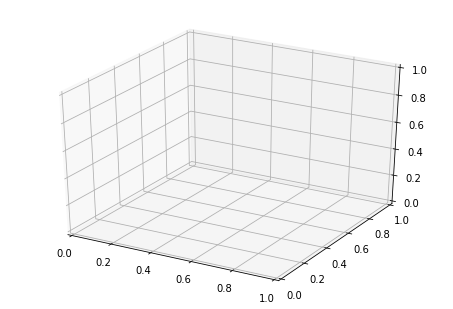

In [39]:
fig_ = plt.figure()
ax_ = Axes3D(fig_)

In [41]:
# Define track eta

track_eta_ = data_.array("trackEta")
print len(track_eta_)

10


Iterating over trackEta
Iterating over trackPhi
Iterating over qoverp
Iterating over dxy
Iterating over dsz


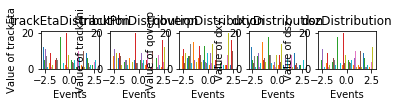

In [47]:
track_properties_ = []
for key in data_.keys():
    if key == 'trackParameters' or key == 'covarianceArray' or 'Hit' in key or 'n' in key or 'Error' in key:
        continue
    else:
        track_properties_.append(key)

for i, key in zip(range(5), track_properties_):
    tmp_array_ = data_.array(key)
    # print key, "length =", len(tmp_array_)
    print "Iterating over", key
    for j in range()
    ax_ = plt.subplot(5, 5, i+1)
    ax_.hist(track_Eta_, histtype='bar', align='mid', orientation='vertical')
    plt.xlabel('Events')
    plt.ylabel('Value of ' + key)
    plt.title(key + 'Distribution')


In [43]:
plt.clf()

<Figure size 432x288 with 0 Axes>

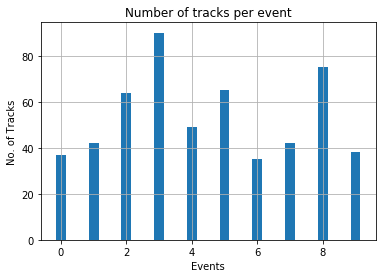

In [44]:
# Plot the distribution of tracks over events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
track_length_ = []

for i in range(10):
     track_length_.append(len(track_Eta_[i]))

ax_ = plt.subplot()

index = np.arange(len(track_length_))
ax_.bar(index, height=track_length_, width=0.3, align='center')

plt.xlabel('Events')
plt.ylabel('No. of Tracks')
plt.title('Number of tracks per event')
plt.grid(True)

plt.show()

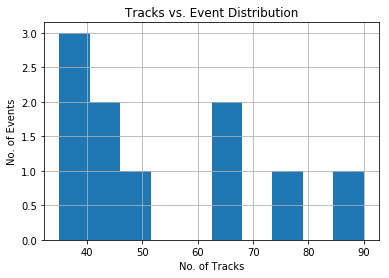

In [73]:
ax_ = plt.subplot()

ax_.hist(track_length_, bins=10, histtype='stepfilled', align='mid', orientation='vertical')
plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Event Distribution')
plt.grid(True)


"\nfor i in range(10):\n    index = np.arange(len(track_Eta_[i]))\n    ax_ = plt.subplot()\n    ax_.bar(index, height=track_length_, width=0.3, align='center')\n"

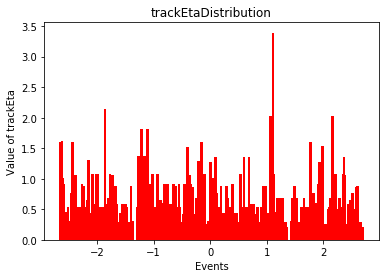

In [102]:
'''
plt.clf()
key = "trackEta"
track_Eta_ = data_.array(key)
ax_ = plt.subplot()

concat_track_Eta_ = []
for i in range(len(track_Eta_)):
    ax_.hist(track_Eta_[i], bins=100, histtype='stepfilled', align='mid', orientation='vertical', color='r', density=True)
    concat_track_Eta_.extend(track_Eta_[i])
    
plt.xlabel('Events')
plt.ylabel('Value of '+ key)
plt.title(key + 'Distribution')
'''
'''
for i in range(10):
    index = np.arange(len(track_Eta_[i]))
    ax_ = plt.subplot()
    ax_.bar(index, height=track_length_, width=0.3, align='center')
'''    

Text(0.5,1,'trackEtaDistribution')

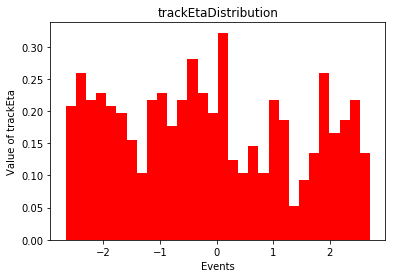

In [107]:
key = "trackEta"

ax_ = plt.subplot()
ax_.hist(concat_track_Eta_, bins=30, histtype='stepfilled', align='mid', orientation='vertical', color='r', density=True)

plt.xlabel('Events')
plt.ylabel('Value of '+ key)
plt.title(key + 'Distribution')


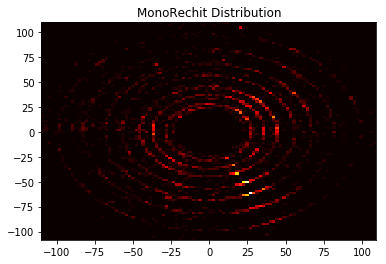

In [97]:
mono_x_ = data_.array("MonoHitX") 
mono_y_ = data_.array("MonoHitY")
mono_z_ = data_.array("MonoHitZ")

plt.clf()
ax_ = plt.subplot()
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('MonoRechit Distribution')
ax_.hist2d(mono_x_[0], mono_y_[0], bins=100, normed=True, cmap='hot')
plt.show()

[4773, 4712, 5224, 7377, 4453, 5937, 4601, 4236, 5254, 3021]


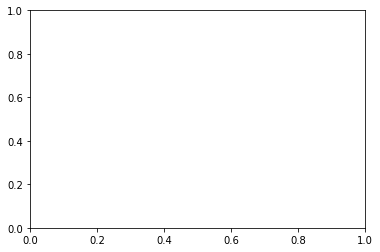

In [99]:
plt.clf()
ax_ = plt.subplot()

mono_rechit_length_ = []

# assumes length of mono_x_ mono_y_ and mono_z_ is the same
for i in range(len(mono_x_)):
        mono_rechit_length_.append(len(mono_x_[i]))
        
print mono_rechit_length_

ax_.hist(mono_rechit_length_, bins=100, histtype='stepfilled', align='mid', orientation='vertical', color='r', density=True)
